# Analyze the radial distribution function
### For cubic boxes

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt

# Basic information

In [2]:
Natom = 12        # the number of atoms in one molecule
Box = 64          # How many boxes
atom_index = 1   # which atom do you aim at?
Box_size = 61.9667    # Length of total indiviual box
bins = 100

file = open("benzene_npt.trj","r")
trajectory = file.readlines()
file.close()

In [3]:
# indices = [index for index, element in enumerate(trajectory) if element == "ITEM: TIMESTEP\n"]
indexes = []
time_steps = []
for i in range (len(trajectory)):
    if trajectory[i]=="ITEM: TIMESTEP\n":
        indexes.append(i)
        tempo = trajectory[i+1].split()
        time_steps.append(int(tempo[0]))

timelines = np.zeros((len(indexes),3))
for i in range (len(indexes)):
    timelines[i,0] = i
    timelines[i,2] = int(indexes[i])
    timelines[i,1] = int(time_steps[i])
        
Ntot = int(trajectory[trajectory.index("ITEM: NUMBER OF ATOMS\n")+1])
repeat_index = int(Ntot/Natom)

## Once you get these parameters, there is no need to change the code below

In [4]:
def distance(list1,list2,Box_size):
    x = list1[0]-list2[0]
    y = list1[1]-list2[1]
    z = list1[2]-list2[2]
    x = x-Box_size*round(x/Box_size)
    y = y-Box_size*round(y/Box_size)
    z = z-Box_size*round(z/Box_size)
    return np.sqrt(x**2+y**2+z**2)

In [5]:
def position_wrap(list1,Box_size):
    for i in range (len(list1)):
        list1[i][0] = list1[i][0]-Box_size*(list1[i][0]//Box_size)
        list1[i][1] = list1[i][1]-Box_size*(list1[i][1]//Box_size)
        list1[i][2] = list1[i][2]-Box_size*(list1[i][2]//Box_size)
    return list1

In [6]:
p = int(timelines[-1][0])
time = time_steps[p]
position = []
for ind in range (indexes[p]+9,len(trajectory)):
    position.append(trajectory[ind].split())
    
atom_position = []
for ind in range (len(position)):
    if (ind+1-atom_index)%Natom == 0:
        atom_position.append([float(position[ind][2]),float(position[ind][3]),float(position[ind][4])])
atom_position = position_wrap(atom_position,Box_size)
        
# get the radial distribution
radial_distribution = []
for i in range (len(atom_position)):
    for j in range (0,i):
        r = distance(atom_position[i],atom_position[j],Box_size)
        radial_distribution.append(r)
        
rdf = np.zeros((len(radial_distribution),1))
for i in range (len(radial_distribution)):
    rdf[i,0] = float(radial_distribution[i])

#### Here you get the radial distribution at the end point

In [7]:
def sphere(r):
    return(4/3*np.pi*r**3)

def volume2(r,L):
    x = r/L
    return (-np.pi/12*(3-36*x**2+32*x**3))*L**3
           
def volume3(r,L):
    x = r/L
    return (-np.pi/4. + 3*np.pi*x**2 + np.sqrt(4*x**2-2) + (1-12*x**2)*np.arctan(np.sqrt(4*x**2-2)) + 2/3*x**2*8*x*np.arctan((2*x*(4*x**2-3))/(np.sqrt(4*x**2-2)*(4*x**2+1))) )*L**3  

In [8]:
def count(list1,data,Natom,Box_size):
    dis = np.zeros((len(list1)-1,2))
    
    vol = np.zeros((len(list1),2))
    for i in range(len(list1)):
        vol[i,0] = list1[i]
        if vol[i,0]<= Box_size/2:
            vol[i,1] = sphere(list1[i])
        elif vol[i,0]<= Box_size*np.sqrt(2)/2:
            vol[i,1] = volume2(list1[i],Box_size)
        elif vol[i,0]<= Box_size*np.sqrt(3)/2 :
            vol[i,1] = volume3(list1[i],Box_size)
    
    for i in range (len(data)):
        for j in range (len(list1)):
            if data[i]>list1[j] and data[i]<=list1[j+1]:
                dis[j,1] += 1
                
    for i in range (len(dis)):
        dis[i,0] = (list1[i]+list1[i+1])/2
        dis[i,1] = dis[i,1]*2/Natom/(vol[i+1,1]-vol[i,1])        

    return dis

In [9]:
# calculate
r_max = np.max(rdf)
r_distribute = np.linspace(0,r_max,bins+1)
vol_tot = Box_size**3

distribute = count(r_distribute,rdf,len(atom_position),Box_size)
distribute[:,1] = distribute[:,1]/(len(atom_position)/vol_tot)

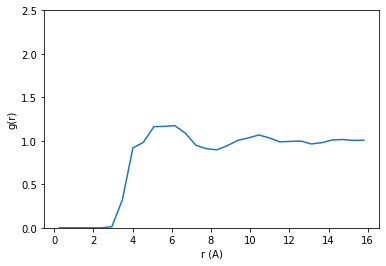

In [14]:
plt.plot(distribute[:30,0],distribute[:30,1])
plt.xlabel("r (A)")
plt.ylabel("g(r)")
plt.ylim(0,2.5)
plt.savefig("benzene.pdf")
plt.show()

In [11]:
61.9667/2*np.sqrt(3)

53.66473638868917

In [12]:
distribute[20]

array([10.97902828,  1.03394312])